In [1]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time
import random
import scipy.stats as stats
from scipy.sparse import *
from lsmc import LMSC_optimize
from visualizingData import *


In [2]:
loaded_matrix = np.load('.\\artificialData\\artificialRatingsV3.npy', allow_pickle=True).item()
sampled_mask = np.load('.\\artificialData\\mask.npy', allow_pickle=True).item().toarray()
dense_matrix = loaded_matrix.toarray()

In [3]:
dense_matrix.shape

(500, 1000)

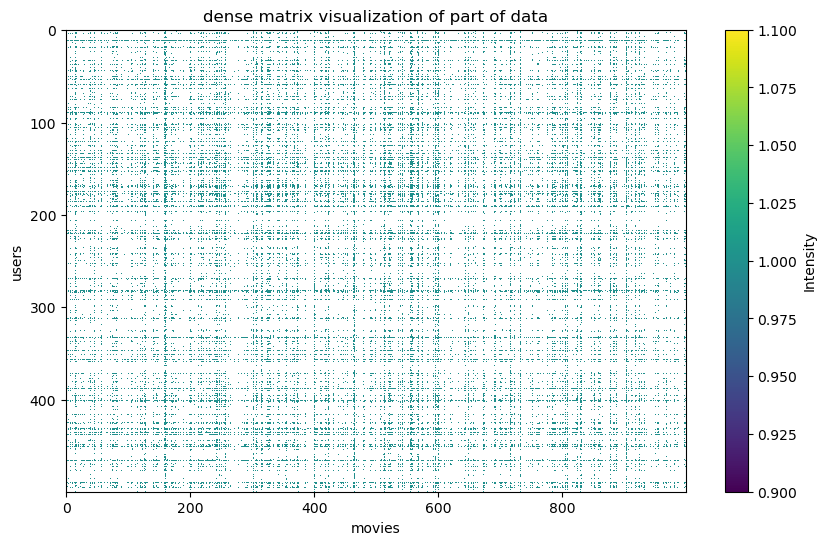

In [4]:
visualizeData(np.where(sampled_mask==0,np.nan,1))

In [6]:
dense_matrix = dense_matrix[:100,:200]
sampled_mask = sampled_mask[:100,:200]

Is lambda smaller then rho?: False
Iteration 1: Rank of P = 332
Iteration 2: Rank of P = 342
Iteration 3: Rank of P = 348
Iteration 4: Rank of P = 352
Iteration 5: Rank of P = 356
Iteration 6: Rank of P = 358
Iteration 7: Rank of P = 360
Iteration 8: Rank of P = 362
Iteration 9: Rank of P = 364
Iteration 10: Rank of P = 366
Iteration 11: Rank of P = 367
Iteration 12: Rank of P = 367
Iteration 13: Rank of P = 368
Iteration 14: Rank of P = 369
Iteration 15: Rank of P = 371
Iteration 16: Rank of P = 371
Iteration 17: Rank of P = 372
Iteration 18: Rank of P = 373
Iteration 19: Rank of P = 373
Iteration 20: Rank of P = 374
Iteration 21: Rank of P = 374
Iteration 22: Rank of P = 375
Iteration 23: Rank of P = 375
Iteration 24: Rank of P = 375
Iteration 25: Rank of P = 375
Iteration 26: Rank of P = 375
Iteration 27: Rank of P = 376
Iteration 28: Rank of P = 376
Iteration 29: Rank of P = 376
Iteration 30: Rank of P = 376
Iteration 31: Rank of P = 377
Iteration 32: Rank of P = 377
Iteration 33: 

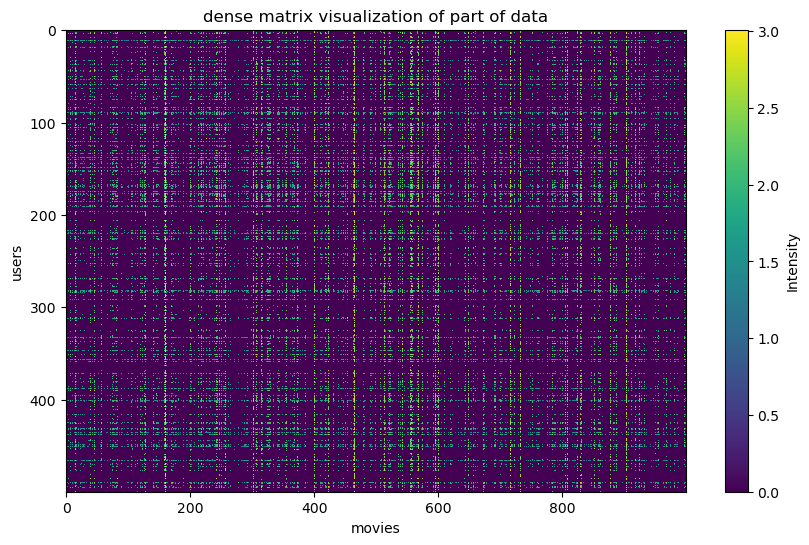

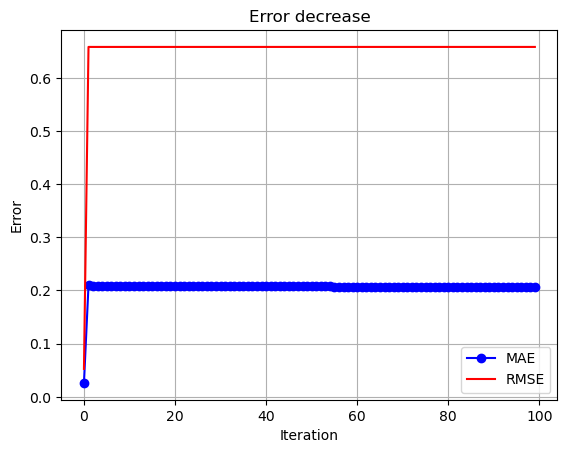

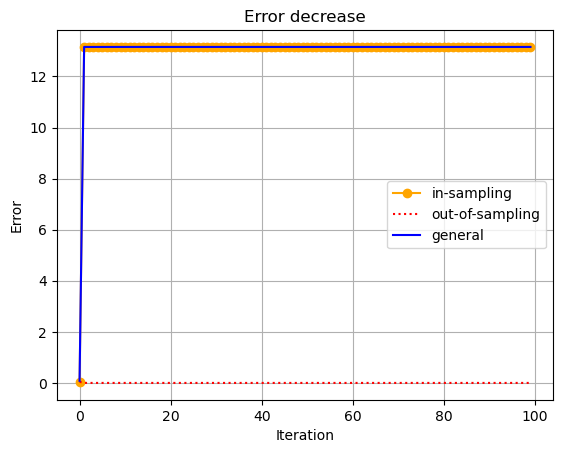

In [ ]:


m,n = dense_matrix.shape

R = dense_matrix
P_init = np.random.rand(m, n)
u_init = np.zeros((m, n))
y_init = np.zeros((m, n)) 
s_init = 1 # ?
lambdas = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,.8,.9,1])

for lambda_ in lambdas:
    rhos = lambda_ * np.array([1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2])
    
    for rho in rhos:
        
        delta = 1e-2 
        # deltas = np.array([1e-2,1e-3,1e-4])

        num_iterations = 100

        # gamma γ = 0, 0.001 and 0.01. 
        gamma = 0.001 #een van de 3 mogelijkheden
        gammas = np.array([0, 0.001 , 0.01])
        for gamma in gammas:
            print(gamma, rho, lambda_)
            epsilon =m*n*gamma # uit de paper
            P_final, Z_final, u_final, y_final, s_final, errors, r_errors = LMSC_optimize(rho, lambda_, R, P_init, sampled_mask, u_init, y_init, s_init, delta, epsilon, num_iterations)

visualizeData(P_final)
errorPlot(errors=errors)
relErrorPlot(r_errors)


In [ ]:
# Matrix dimensions
m, n = dense_matrix.shape

# Initializing matrices and variables
R = dense_matrix  # Original dense matrix
P_init = np.random.rand(m, n)  # Initial guess for matrix P
u_init = np.zeros((m, n))  # Initial values for u
y_init = np.zeros((m, n))  # Initial values for y
s_init = 1  # Initial value for s

# Define ranges for hyperparameters
lambdas = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])  # Regularization parameter λ values
gammas = np.array([0, 0.001, 0.01])  # Step size or learning rate γ values
delta = 1e-2  # Tolerance level for optimization
num_iterations = 100  # Number of iterations for optimization

# List to store results
results = []
# Iterate over lambda values
for lambda_ in lambdas:
    # Compute corresponding rho values as scaled factors of λ
    rhos = lambda_ * np.array([1, 1.2, 1.3, 1.5, 1.7, 2,2.5,3])

    # Iterate over rho values
    for rho in rhos:
        # Iterate over gamma values
        for gamma in gammas:
            # Calculate epsilon based on matrix size and gamma
            epsilon = m * n * gamma  # Error threshold as defined in the paper
            
            # Print current parameter settings
            print(f"Current settings: gamma = {gamma}, rho = {rho}, lambda = {lambda_}")

            # Run the optimization function with the current parameters
            P_final, Z_final, u_final, y_final, s_final, errors, r_errors = LMSC_optimize(
                rho, lambda_, R, P_init, sampled_mask, u_init, y_init, s_init, delta, epsilon, num_iterations
            )
            
            print(f"Finished w/ settings: gamma = {gamma}, rho = {rho}, lambda = {lambda_}\n")
            # Store the results in a dictionary
            result = {
                'lambda': lambda_,
                'rho': rho,
                'gamma': gamma,
                'errors': errors,
                'relative_errors': r_errors
            }
            results.append(result)


In [7]:
dense_matrix.shape

(300, 400)

Iteration 1: Rank of P = 110
Iteration 2: Rank of P = 75
Iteration 3: Rank of P = 97
Iteration 4: Rank of P = 101
Iteration 5: Rank of P = 102
Iteration 6: Rank of P = 101
Iteration 7: Rank of P = 103
Iteration 8: Rank of P = 103
Iteration 9: Rank of P = 106
Iteration 10: Rank of P = 111
Iteration 11: Rank of P = 115
Iteration 12: Rank of P = 119
Iteration 13: Rank of P = 121
Iteration 14: Rank of P = 127
Iteration 15: Rank of P = 131
Iteration 16: Rank of P = 135
Iteration 17: Rank of P = 138
Iteration 18: Rank of P = 142
Iteration 19: Rank of P = 144
Iteration 20: Rank of P = 148
Iteration 21: Rank of P = 150
Iteration 22: Rank of P = 152
Iteration 23: Rank of P = 155
Iteration 24: Rank of P = 158
Iteration 25: Rank of P = 160
Iteration 26: Rank of P = 162
Iteration 27: Rank of P = 164
Iteration 28: Rank of P = 167
Iteration 29: Rank of P = 167
Iteration 30: Rank of P = 169
Iteration 31: Rank of P = 171
Iteration 32: Rank of P = 172
Iteration 33: Rank of P = 173
Iteration 34: Rank of

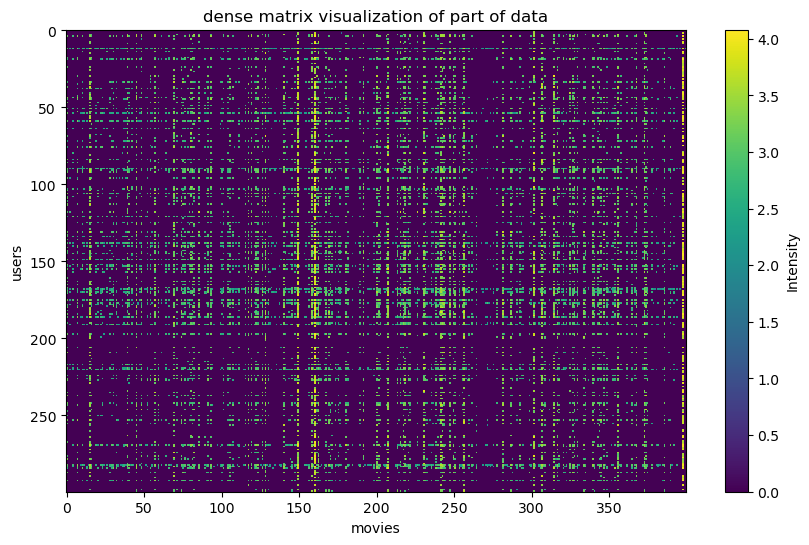

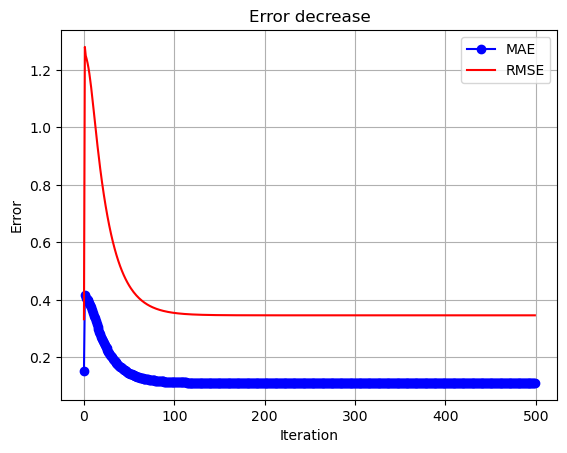

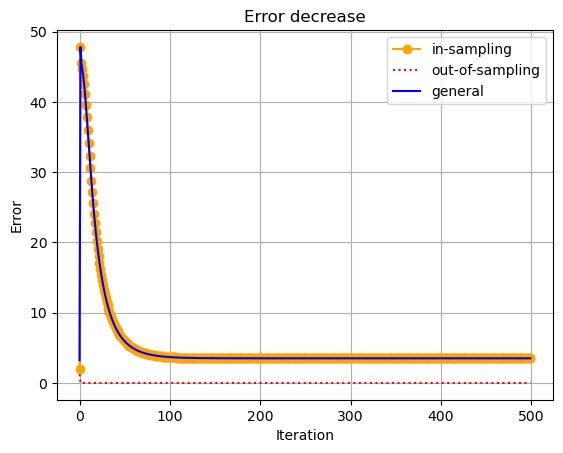

In [8]:


m,n = dense_matrix.shape

R =dense_matrix
P_init = np.random.rand(m, n)
u_init = np.zeros((m, n))
y_init = np.zeros((m, n)) 
s_init = 1 # ?
rho = .1 # HEEL BELANGRIJK OM RHO LAAG TE HOUDEN OMDAT DIT DIRECT OMGEKEERD EVENREDIG IS MET DE THRESHOLD 
lambda_ = .4 #vanuit de grafiek als minimum bij de foods

delta = 1e-2 #convention?!?
num_iterations = 500

# gamma γ = 0, 0.001 and 0.01. 
gamma = 0.001 #een van de 3 mogelijkheden
epsilon =m*n*gamma # uit de paper

P_final, Z_final, u_final, y_final, s_final, errors, rel_errors = LMSC_optimize(rho, lambda_, R, P_init, sampled_mask, u_init, y_init, s_init, delta, epsilon, num_iterations)


visualizeData(P_final)
errorPlot(errors=errors)
relErrorPlot(rel_errors)


In [9]:
(np.array(rel_errors)[:,1])

array([1.23366701e+00, 3.36880538e-03, 2.48843001e-03, 2.94395992e-03,
       3.51626694e-03, 4.07144660e-03, 4.42361085e-03, 4.52833658e-03,
       4.42344116e-03, 4.16867288e-03, 3.86767966e-03, 3.55371817e-03,
       3.38816090e-03, 3.20070428e-03, 3.08584058e-03, 2.91046379e-03,
       2.81313945e-03, 2.76010063e-03, 2.55162254e-03, 2.45288079e-03,
       2.31871847e-03, 2.21822597e-03, 2.00830463e-03, 1.83862583e-03,
       1.65388315e-03, 1.48344011e-03, 1.39227242e-03, 1.19028612e-03,
       1.13024612e-03, 1.06575659e-03, 8.99336705e-04, 8.13195178e-04,
       8.09265998e-04, 7.48178333e-04, 6.26329161e-04, 5.81862637e-04,
       5.24988042e-04, 4.89930960e-04, 4.71648773e-04, 3.75888962e-04,
       3.37872014e-04, 3.27538107e-04, 2.96882975e-04, 2.92836960e-04,
       2.76521905e-04, 2.28911567e-04, 2.24732389e-04, 2.27466127e-04,
       1.95726428e-04, 1.66844250e-04, 1.42949835e-04, 1.38290795e-04,
       1.39159322e-04, 1.39940211e-04, 1.40654684e-04, 1.18944181e-04,
      

Iteration 1: Rank of P = 110
Iteration 2: Rank of P = 53
Iteration 3: Rank of P = 48
Iteration 4: Rank of P = 45
Iteration 5: Rank of P = 44
Iteration 6: Rank of P = 42
Iteration 7: Rank of P = 41
Iteration 8: Rank of P = 40
Iteration 9: Rank of P = 39
Iteration 10: Rank of P = 39
Iteration 11: Rank of P = 39
Iteration 12: Rank of P = 39
Iteration 13: Rank of P = 39
Iteration 14: Rank of P = 39
Iteration 15: Rank of P = 39
Iteration 16: Rank of P = 39
Iteration 17: Rank of P = 39
Iteration 18: Rank of P = 39
Iteration 19: Rank of P = 39
Iteration 20: Rank of P = 38
Iteration 21: Rank of P = 38
Iteration 22: Rank of P = 38
Iteration 23: Rank of P = 38
Iteration 24: Rank of P = 37
Iteration 25: Rank of P = 37
Iteration 26: Rank of P = 37
Iteration 27: Rank of P = 37
Iteration 28: Rank of P = 37
Iteration 29: Rank of P = 37
Iteration 30: Rank of P = 37
Iteration 31: Rank of P = 37
Iteration 32: Rank of P = 37
Iteration 33: Rank of P = 37
Iteration 34: Rank of P = 37
Iteration 35: Rank of 

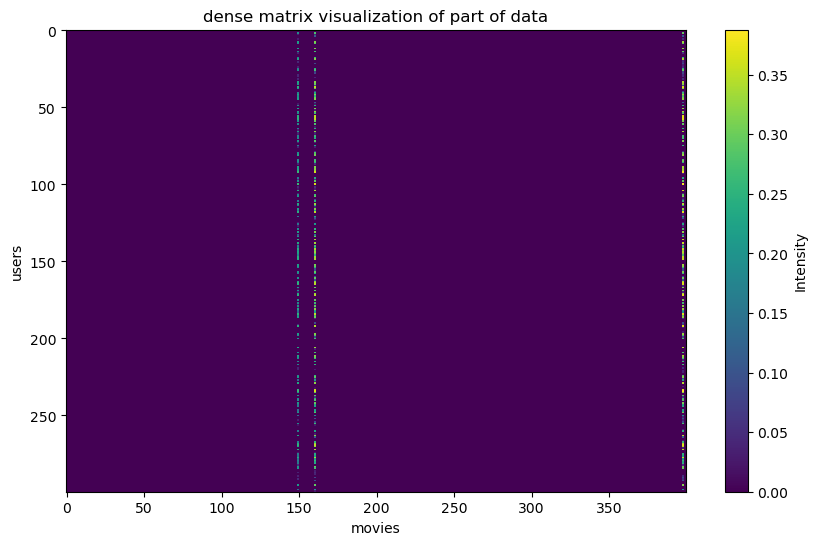

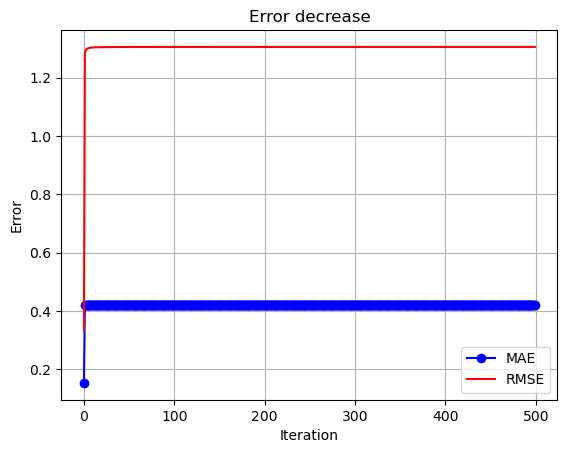

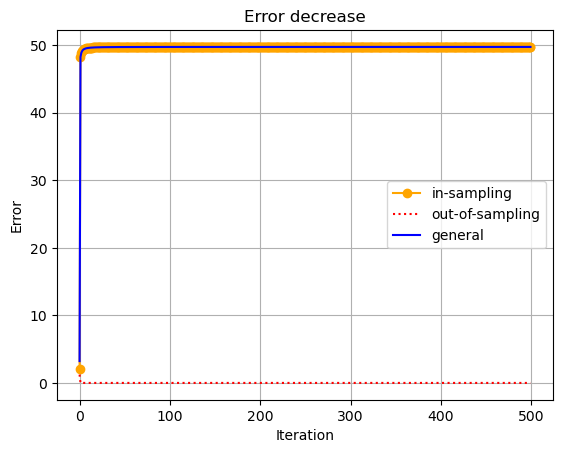

In [10]:


m,n = dense_matrix.shape

R =dense_matrix
P_init = np.random.rand(m, n)
u_init = np.zeros((m, n))
y_init = np.zeros((m, n)) 
s_init = 1 # ?
rho = .1 # HEEL BELANGRIJK OM RHO LAAG TE HOUDEN OMDAT DIT DIRECT OMGEKEERD EVENREDIG IS MET DE THRESHOLD 
lambda_ = .4 #vanuit de grafiek als minimum bij de foods

delta = 1e-2 #convention?!?
num_iterations = 500

# gamma γ = 0, 0.001 and 0.01. 
gamma = 0.01 #een van de 3 mogelijkheden
epsilon =m*n*gamma # uit de paper

P_final, Z_final, u_final, y_final, s_final, errors, rel_errors = LMSC_optimize(rho, lambda_, R, P_init, sampled_mask, u_init, y_init, s_init, delta, epsilon, num_iterations)


visualizeData(P_final)
errorPlot(errors=errors)
relErrorPlot(rel_errors)


In [11]:
errors[-1]

[0.421066359046849, 1.3054104379012237]

In [ ]:
lambdas = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,.8,.9,1])

Iteration 1: Rank of P = 172
Iteration 2: Rank of P = 183
Iteration 3: Rank of P = 188
Iteration 4: Rank of P = 189
Iteration 5: Rank of P = 193
Iteration 6: Rank of P = 194
Iteration 7: Rank of P = 195
Iteration 8: Rank of P = 195
Iteration 9: Rank of P = 196
Iteration 10: Rank of P = 196
Iteration 11: Rank of P = 197
Iteration 12: Rank of P = 197
Iteration 13: Rank of P = 198
Iteration 14: Rank of P = 198
Iteration 15: Rank of P = 199
Iteration 16: Rank of P = 199
Iteration 17: Rank of P = 199
Iteration 18: Rank of P = 199
Iteration 19: Rank of P = 199
Iteration 20: Rank of P = 199
Iteration 21: Rank of P = 199
Iteration 22: Rank of P = 199
Iteration 23: Rank of P = 199
Iteration 24: Rank of P = 200
Iteration 25: Rank of P = 200
Iteration 26: Rank of P = 201
Iteration 27: Rank of P = 201
Iteration 28: Rank of P = 201
Iteration 29: Rank of P = 201
Iteration 30: Rank of P = 201
Iteration 31: Rank of P = 201
Iteration 32: Rank of P = 201
Iteration 33: Rank of P = 201
Iteration 34: Rank 

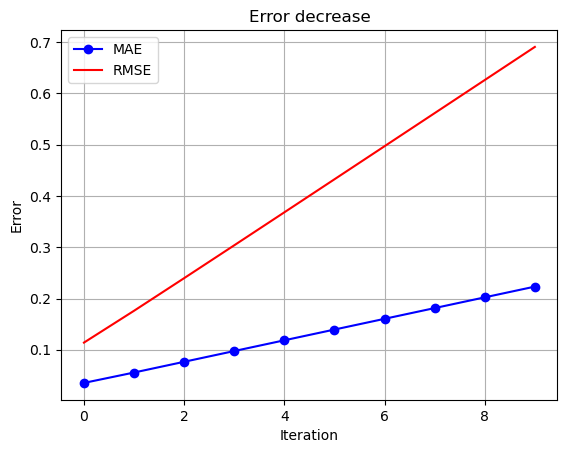

In [41]:

m,n = dense_matrix.shape

R =dense_matrix
P_init = np.random.rand(m, n)
u_init = np.zeros((m, n))
y_init = np.zeros((m, n)) 
s_init = 1 # ?
rho = .5 # HEEL BELANGRIJK OM RHO LAAG TE HOUDEN OMDAT DIT DIRECT OMGEKEERD EVENREDIG IS MET DE THRESHOLD 
# lambda_ = .4 #vanuit de grafiek als minimum bij de foods

delta = 1e-2 #convention?!?
num_iterations = 1000

# gamma γ = 0, 0.001 and 0.01. 
gamma = 0.01 #een van de 3 mogelijkheden
epsilon =m*n*gamma # uit de paper

l_errors_1 = []
for l in lambdas:
    P_final, Z_final, u_final, y_final, s_final, errors, rel_errors = LMSC_optimize(rho, l, R, P_init, sampled_mask, u_init, y_init, s_init, delta, epsilon, num_iterations)
    l_errors_1.append(errors[-1])


errorPlot(l_errors_1)

    
    

In [42]:
MAE_1 = np.array(l_errors_1)[:,0]

In [43]:
MAE_1

array([0.03539615, 0.05567127, 0.07661398, 0.09755992, 0.11850467,
       0.13944784, 0.16038893, 0.18132718, 0.20226147, 0.22319004])

Iteration 1: Rank of P = 172
Iteration 2: Rank of P = 183
Iteration 3: Rank of P = 188
Iteration 4: Rank of P = 189
Iteration 5: Rank of P = 193
Iteration 6: Rank of P = 194
Iteration 7: Rank of P = 195
Iteration 8: Rank of P = 195
Iteration 9: Rank of P = 196
Iteration 10: Rank of P = 196
Iteration 11: Rank of P = 197
Iteration 12: Rank of P = 197
Iteration 13: Rank of P = 198
Iteration 14: Rank of P = 198
Iteration 15: Rank of P = 199
Iteration 16: Rank of P = 199
Iteration 17: Rank of P = 199
Iteration 18: Rank of P = 199
Iteration 19: Rank of P = 199
Iteration 20: Rank of P = 199
Iteration 21: Rank of P = 199
Iteration 22: Rank of P = 199
Iteration 23: Rank of P = 199
Iteration 24: Rank of P = 200
Iteration 25: Rank of P = 200
Iteration 26: Rank of P = 201
Iteration 27: Rank of P = 201
Iteration 28: Rank of P = 201
Iteration 29: Rank of P = 201
Iteration 30: Rank of P = 201
Iteration 31: Rank of P = 201
Iteration 32: Rank of P = 201
Iteration 33: Rank of P = 201
Iteration 34: Rank 

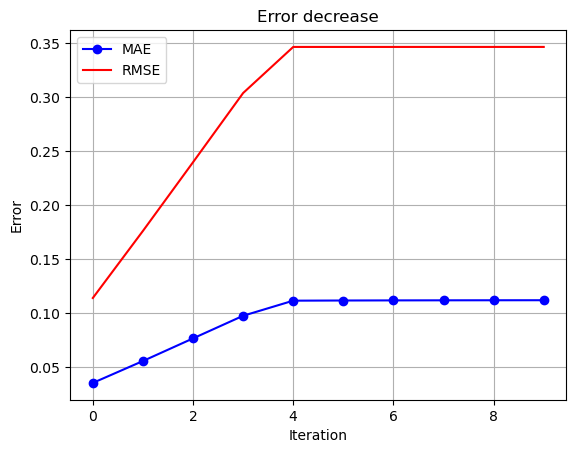

In [44]:

gamma = 0.001 #een van de 3 mogelijkheden
epsilon =m*n*gamma # uit de paper

l_errors_2 = []
for l in lambdas:
    P_final, Z_final, u_final, y_final, s_final, errors, rel_errors = LMSC_optimize(rho, l, R, P_init, sampled_mask, u_init, y_init, s_init, delta, epsilon, num_iterations)
    l_errors_2.append(errors[-1])





errorPlot(l_errors_2)


Iteration 1: Rank of P = 172
Iteration 2: Rank of P = 183
Iteration 3: Rank of P = 188
Iteration 4: Rank of P = 189
Iteration 5: Rank of P = 193
Iteration 6: Rank of P = 194
Iteration 7: Rank of P = 195
Iteration 8: Rank of P = 196
Iteration 9: Rank of P = 196
Iteration 10: Rank of P = 196
Iteration 11: Rank of P = 197
Iteration 12: Rank of P = 198
Iteration 13: Rank of P = 198
Iteration 14: Rank of P = 198
Iteration 15: Rank of P = 199
Iteration 16: Rank of P = 199
Iteration 17: Rank of P = 199
Iteration 18: Rank of P = 199
Iteration 19: Rank of P = 199
Iteration 20: Rank of P = 199
Iteration 21: Rank of P = 199
Iteration 22: Rank of P = 199
Iteration 23: Rank of P = 200
Iteration 24: Rank of P = 201
Iteration 25: Rank of P = 201
Iteration 26: Rank of P = 201
Iteration 27: Rank of P = 201
Iteration 28: Rank of P = 201
Iteration 29: Rank of P = 201
Iteration 30: Rank of P = 201
Iteration 31: Rank of P = 201
Iteration 32: Rank of P = 201
Iteration 33: Rank of P = 201
Iteration 34: Rank 

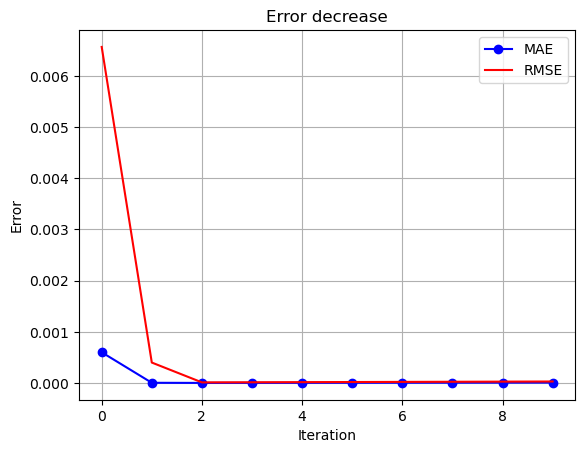

In [45]:

gamma = 0 #een van de 3 mogelijkheden
epsilon =m*n*gamma # uit de paper

l_errors_3 = []
for l in lambdas:
    P_final, Z_final, u_final, y_final, s_final, errors, rel_errors = LMSC_optimize(rho, l, R, P_init, sampled_mask, u_init, y_init, s_init, delta, epsilon, num_iterations)
    l_errors_3.append(errors[-1])


errorPlot(l_errors_3)


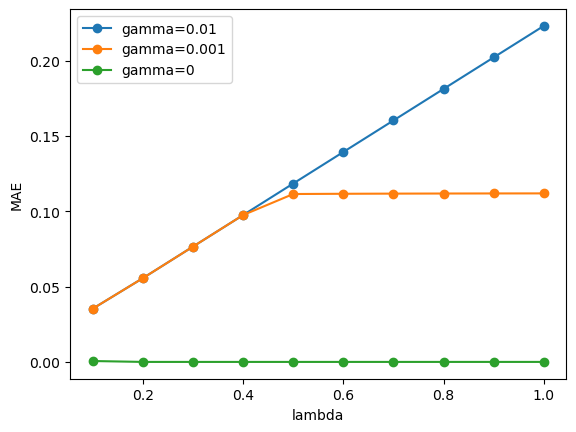

In [46]:
MAE_1 = np.array(l_errors_1)[:,0]
MAE_2 = np.array(l_errors_2)[:,0]
MAE_3 = np.array(l_errors_3)[:,0]
# x = lambdas
plt.plot(lambdas,MAE_1, 'o-' ,label='gamma=0.01')
plt.plot(lambdas,MAE_2,'o-' ,label='gamma=0.001')
plt.plot(lambdas,MAE_3, 'o-' ,label='gamma=0')
plt.xlabel('lambda')
plt.ylabel('MAE')
plt.legend()
plt.show()

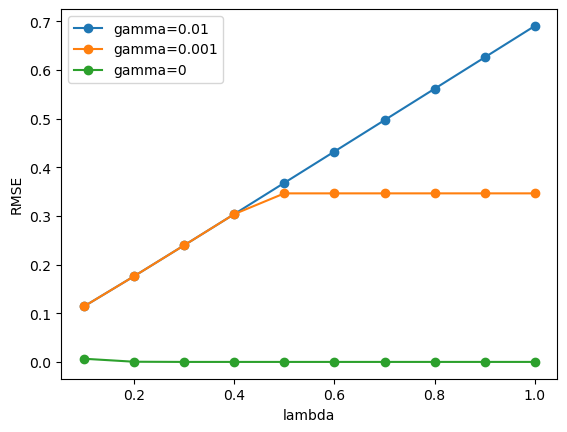

In [47]:
MAE_1 = np.array(l_errors_1)[:,1]
MAE_2 = np.array(l_errors_2)[:,1]
MAE_3 = np.array(l_errors_3)[:,1]
# x = lambdas
plt.plot(lambdas,MAE_1, 'o-' ,label='gamma=0.01')
plt.plot(lambdas,MAE_2,'o-' ,label='gamma=0.001')
plt.plot(lambdas,MAE_3, 'o-' ,label='gamma=0')
plt.xlabel('lambda')
plt.ylabel('RMSE')
plt.legend()
plt.show()

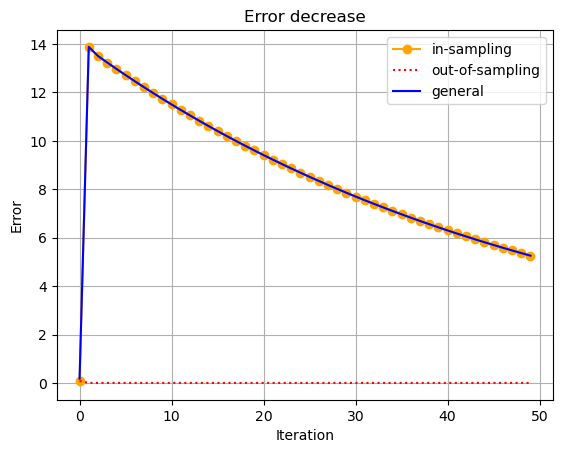

In [16]:
from visualizingData import *
relErrorPlot(rel_errors)

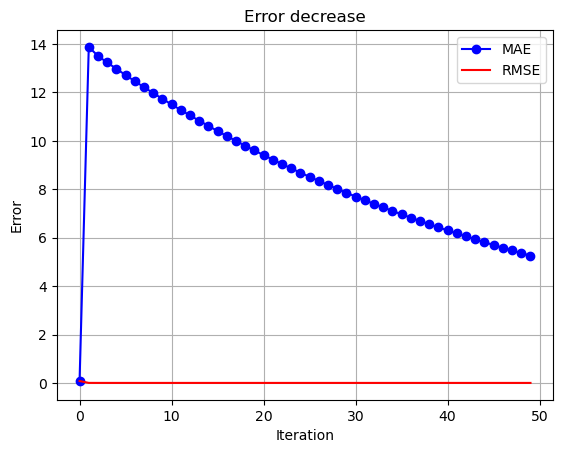

In [17]:
errorPlot(errors=rel_errors)

In [18]:
202/m

0.6733333333333333

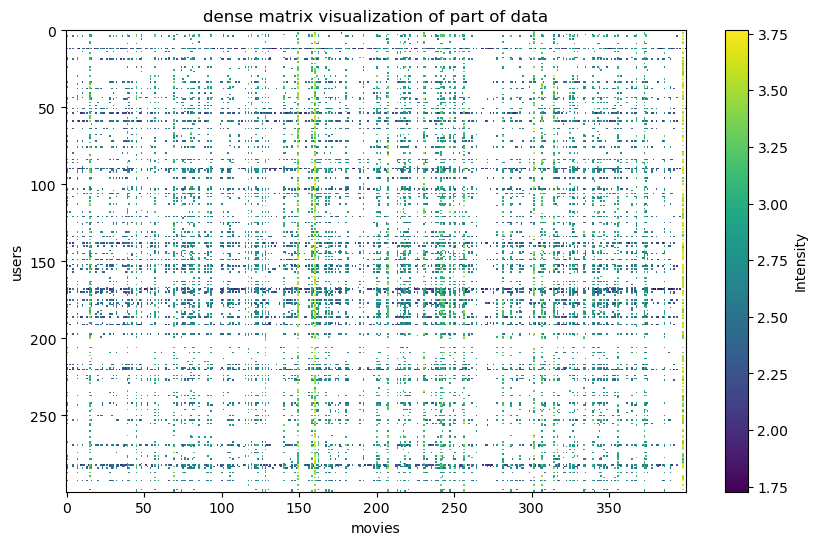

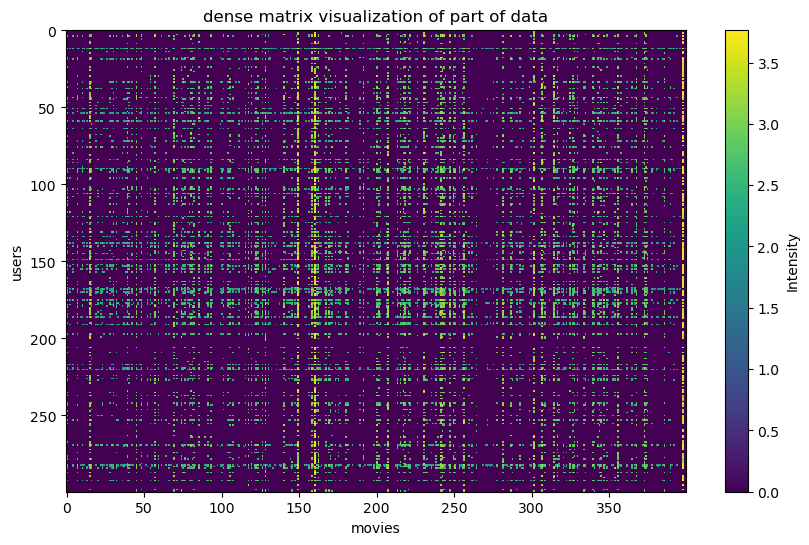

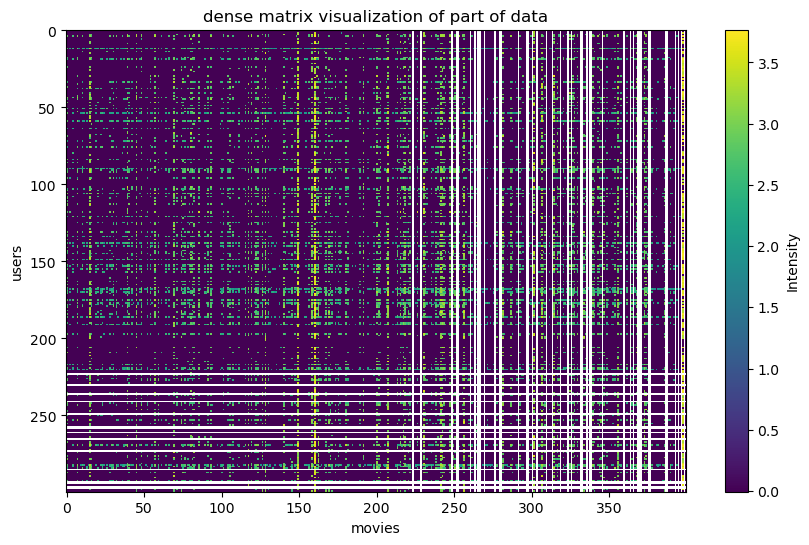

In [19]:
visualizeData(np.where(Z_final==0, np.nan, Z_final))
visualizeData(Z_final)
visualizeData(np.where(P_final==0,np.nan,P_final))

In [20]:

m,n = dense_matrix.shape

R =dense_matrix
P_init = np.random.rand(m, n)
u_init = np.zeros((m, n))
y_init = np.zeros((m, n)) 
s_init = 1 # ?
rho = .01 # HEEL BELANGRIJK OM RHO LAAG TE HOUDEN OMDAT DIT DIRECT OMGEKEERD EVENREDIG IS MET DE THRESHOLD 
lambda_ = .4 #vanuit de grafiek als minimum bij de foods

delta = 1e-2 #convention?!?
num_iterations = 1000

# gamma γ = 0, 0.001 and 0.01. 
gamma = 0.001 #een van de 3 mogelijkheden
epsilon =m*n*gamma # uit de paper

P_final, Z_final, u_final, y_final, s_final, errors = LMSC_optimize(rho, lambda_, R, P_init, u_init, y_init, s_init, delta, epsilon, num_iterations)


visualizeData(P_final)
errorPlot(errors=errors)


TypeError: LMSC_optimize() missing 1 required positional argument: 'num_iterations'